<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Raajitha_Statistical_Analysis_(gender_and_los_admission)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/ch_02_end_to_end_ml.csv')

In [ ]:
df.head()

,subject_id,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,...,drg_code,medication,event_txt,drug,route,org_name,test_name,quantity,ab_name,curr_service
0,10000032,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,...,283.0,Potassium Chloride,Administered,Acetaminophen,PO/NG,NaN,TOXOPLASMA IgG ANTIBODY,NaN,NaN,MED
1,10000068,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
2,10000084,EW EMER.,P6957U,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,0,...,42.0,Pramipexole,Administered,QUEtiapine Fumarate,PO/NG,NaN,"Blood Culture, Routine",NaN,NaN,MED
3,10000108,EU OBSERVATION,P38XXV,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,...,NaN,NaN,NaN,NaN,NaN,ACTINOBACILLUS ACTINOMYCETEMCOMITANS,WOUND CULTURE,NaN,NaN,MED
4,10000117,EU OBSERVATION,P2358X,EMERGENCY ROOM,NaN,Other,ENGLISH,DIVORCED,WHITE,0,...,308.0,Influenza Vaccine Quadrivalent,Hold Dose,Heparin,SC,CAMPYLOBACTER JEJUNI,CAMPYLOBACTER CULTURE,NaN,NaN,MED


In [ ]:
df.columns

Index(['subject_id', 'admission_type', 'admit_provider_id',
       'admission_location', 'discharge_location', 'insurance', 'language',
       'marital_status', 'race', 'hospital_expire_flag', 'los_admission',
       'gender', 'anchor_age', 'eventtype', 'careunit', 'diagnosis_icd_code',
       'procedures_icd_code', 'drg_type', 'drg_code', 'medication',
       'event_txt', 'drug', 'route', 'org_name', 'test_name', 'quantity',
       'ab_name', 'curr_service'],
      dtype='object')

In [ ]:
df.drop(['subject_id', 'admit_provider_id'], axis=1, inplace=True)

In [ ]:
df.isna().sum()

,0
admission_type,0
admission_location,0
discharge_location,52334
insurance,0
language,0
marital_status,7252
race,0
hospital_expire_flag,0
los_admission,0
gender,0


In [ ]:
df.fillna(0, inplace=True)
df.isna().sum()

,0
admission_type,0
admission_location,0
discharge_location,0
insurance,0
language,0
marital_status,0
race,0
hospital_expire_flag,0
los_admission,0
gender,0


In [ ]:
df.drg_type.value_counts()

,count
drg_type,
APR,137699
0,36281
HCFA,6697



### 1. Distribution of Length of Stay (los_admission)

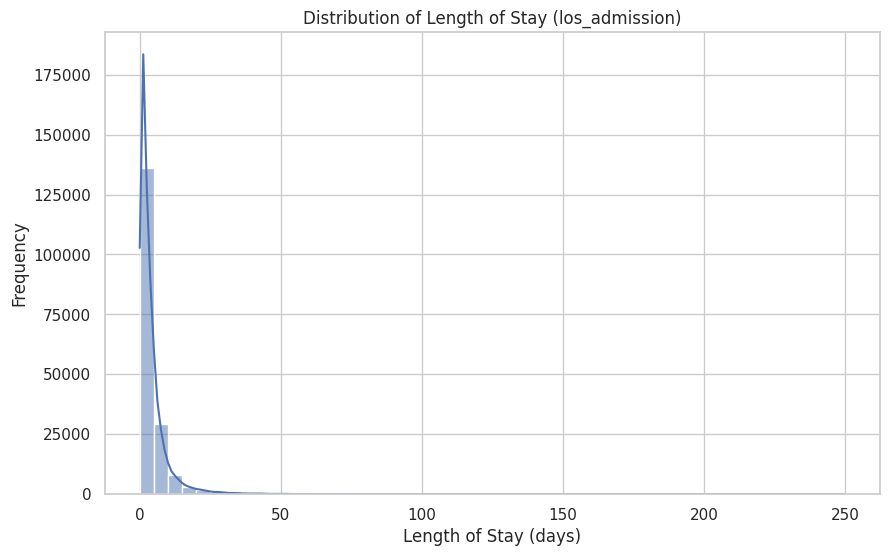

In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['los_admission'], bins=50, kde=True)
plt.title('Distribution of Length of Stay (los_admission)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of length of stay in the hospital, with most stays being relatively short.

### 2. Length of Stay by Gender

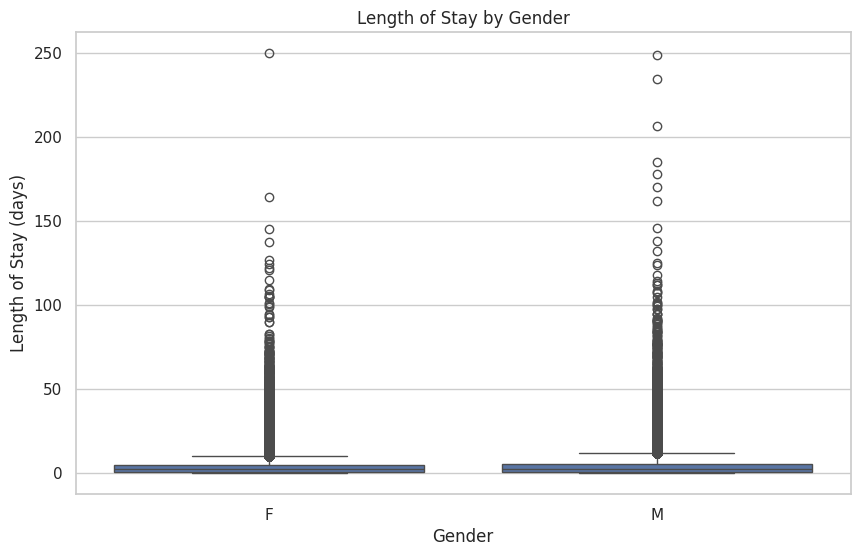

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='los_admission', data=df)
plt.title('Length of Stay by Gender')
plt.xlabel('Gender')
plt.ylabel('Length of Stay (days)')
plt.show()


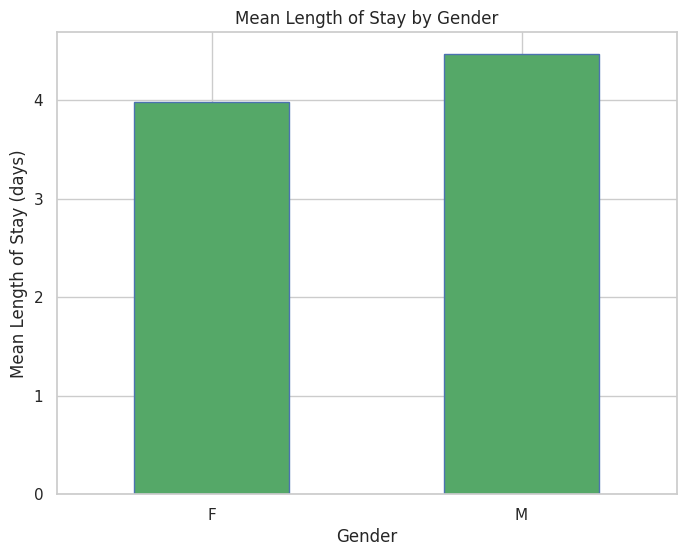

In [ ]:
gender_los = df.groupby('gender')['los_admission'].mean()

plt.figure(figsize=(8, 6))
gender_los.plot(kind='bar', color = 'g', edgecolor = 'b')
plt.title('Mean Length of Stay by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Length of Stay (days)')
plt.xticks(rotation=0)
plt.show()

### 3. Length of Stay by Admission Type

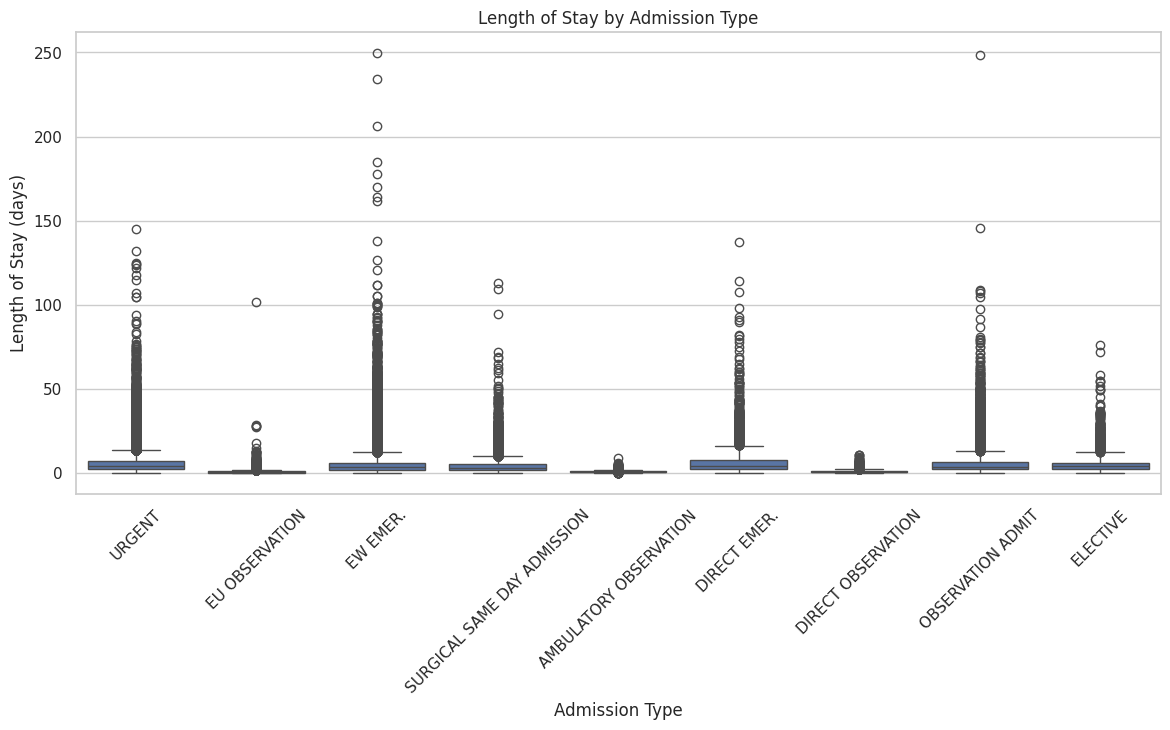

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='admission_type', y='los_admission', data=df)
plt.title('Length of Stay by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Length of Stay (days)')
plt.xticks(rotation=45)
plt.show()




### 4. Length of Stay by Insurance Type

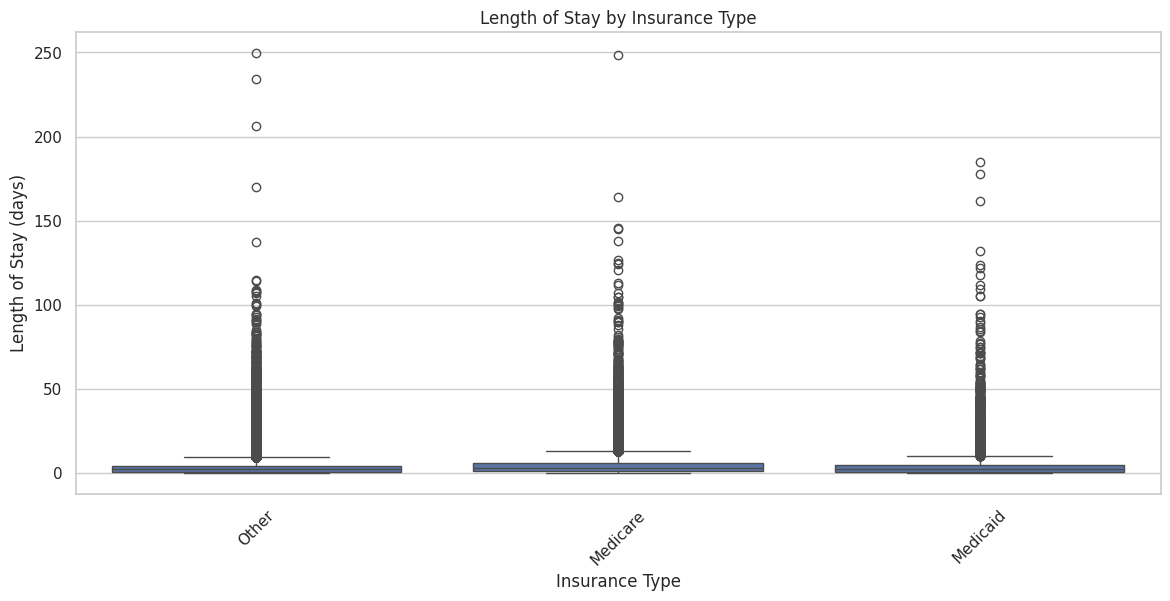

In [ ]:

plt.figure(figsize=(14, 6))
sns.boxplot(x='insurance', y='los_admission', data=df)
plt.title('Length of Stay by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Length of Stay (days)')
plt.xticks(rotation=45)
plt.show()


###Signicance of gender on LOS

Null Hypothesis : There is no significant difference in the length of stay (los_admission) between male and female patients.

Alternative Hypothesis : There is a significant difference in the length of stay (los_admission) between male and female patients.

In [ ]:
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind

** Descriptive Statistics**

Purpose: To get a basic understanding of the data by summarizing key statistics
like the mean, standard deviation, and percentiles for the length of stay (los_admission) for each gender.

In [ ]:
descriptive_stats = df.groupby('gender')['los_admission'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,95698.0,3.983757,5.660249,0.000694,1.019444,2.579167,4.697917,249.585417
M,84979.0,4.463552,6.746112,0.000694,0.945139,2.536806,5.382292,248.448611


The average length of stay is slightly higher for males (4.46 days) compared to females (3.98 days).

**Shapiro-Wilk Test**

Purpose: To check if the length of stay data for each gender follows a normal distribution.

In [ ]:
shapiro_male = shapiro(df[df['gender'] == 'M']['los_admission'])
shapiro_female = shapiro(df[df['gender'] == 'F']['los_admission'])
print ('The normality test for males', shapiro_male)
print ('The normality test for females', shapiro_female)

The normality test for males ShapiroResult(statistic=0.5440397186033434, pvalue=1.8001719775007464e-153)
The normality test for females ShapiroResult(statistic=0.5448289173137745, pvalue=1.3490704629493107e-156)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 84979.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 95698.
  res = hypotest_fun_out(*samples, **kwds)


Since the p-values are very small (less than 0.05), suggesting a deviation from normality, we conclude that the data for both genders is not normally distributed.

**Levene's Test**- Variance Homogeneity Test

Purpose: To check if the spread (variance) of the length of stay is the same for both genders.


In [ ]:
levene_test = levene(df[df['gender'] == 'M']['los_admission'],
                     df[df['gender'] == 'F']['los_admission'])
levene_test

LeveneResult(statistic=472.43488938484694, pvalue=1.2893776100101265e-104)

 The very small p-value indicates that the variances are significantly different between genders.

**Mann-Whitney U Test**

Purpose: To determine if there is a statistically significant difference in the length of stay between male and female patients.

In [ ]:
u_stat, p_value = mannwhitneyu(df[df['gender'] == 'M']['los_admission'],
                               df[df['gender'] == 'F']['los_admission'], alternative='two-sided')
print(f"Mann-Whitney U Test Statistic: {u_stat}")
print(f"P-value: {p_value}")


Mann-Whitney U Test Statistic: 4106046691.5
P-value: 0.00031263586380444764


The p-value is less than 0.05, so we reject the null hypothesis. This means there is a statistically significant difference in the length of stay between males and females.

**Cohen's d Test**

Purpose: To measure the size of the difference in length of stay between males and females.

In [ ]:
mean_male = df[df['gender'] == 'M']['los_admission'].mean()
mean_female = df[df['gender'] == 'F']['los_admission'].mean()
std_male = df[df['gender'] == 'M']['los_admission'].std()
std_female = df[df['gender'] == 'F']['los_admission'].std()
pooled_std = np.sqrt((std_male ** 2 + std_female ** 2) / 2)
cohen_d = (mean_male - mean_female) / pooled_std

cohen_d


0.07705204952938023

Cohen's d of 0.077 is considered a small effect size, indicating that the actual difference in length of stay between genders, while statistically significant, is small in practical terms.

###**Conclusion**

Based on the statistical analysis, I performed the Mann-Whitney U test due to the non-normal distribution of the data and unequal variances between the groups. The test yielded a p-value of 0.000313, which is significantly less than the commonly used threshold of 0.05.

Given this p-value, I reject the null hypothesis in favor of the alternative hypothesis. This indicates that there is a statistically significant difference in the length of stay (los_admission) between male and female patients.

However, the effect size (Cohen's d = 0.077) indicates that the difference, while statistically significant, is small in practical terms. This means that although gender does affect the length of stay, the magnitude of this effect is minor.